<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 9: Filterung
## 2D Fourier-Transformation
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
tiny=1e-15

In [2]:
def change_fontsize(SMALL_SIZE=15,MEDIUM_SIZE=20,BIGGER_SIZE=25):
    """
    re-set matplotlib fonts with three different sizes:
    SMALL_SIZE=15 (default)
    MEDIUM_SIZE=20 (default)
    BIGGER_SIZE=25 (default)
    """
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
change_fontsize(SMALL_SIZE=12)

----
## 2D Fourier transform

We continue discussing **Fourier transformations** in this notebook series with the
**two-dimensional transform** of a signal.

### Space domain

We define the **space domain** with:

- Positions $x,y$ [m]
- Wavelengths $\lambda_x,\lambda_y$ [m]
- Wave numbers $\nu_x,\nu_y$ [1/m]
- Angular wave numbers $k_x,k_y$ [1/m]

We have: $\lambda_x={{1}\over{\nu_x}}$ and $k_x=2\pi \nu_x$, as well as
$\lambda_y={{1}\over{\nu_y}}$ and $k_y=2\pi \nu_y$.

The **Fourier transform** pair is given as:
$$
\begin{array}{rcl}
F(k_x,k_y) &=& \int\limits_{-\infty}^{+\infty} 
               \int\limits_{-\infty}^{+\infty} f(x,y) e^{-i (k_x x + k_y y)} dx dy \\
f(x,y)     &=& \int\limits_{-\infty}^{+\infty} 
               \int\limits_{-\infty}^{+\infty} F(k_x,k_y) e^{i (k_x x + k_y y)} dk_x dk_y
\end{array}
$$

----
## Example

We define a 2D domain $x \in [-xmax,xmax]$ and $y \in [-ymax,ymax]$, with $nx \times ny$ points.
The function $f$ is zero, except in a circle centered around the point $(x,y)=(0,0)$:
$$
f = \left\{
\begin{array}{rr}
1 & x^2+y^2 < 1 \\
0 & \mbox{else}
\end{array}
\right.
$$

We plot the function $f$, its 2D Fourier transform, and the recovered inverse Fourier transform.

(500, 500) (500, 500) (500, 500) 2
-20.0 20.0
-20.0 20.0
0 1


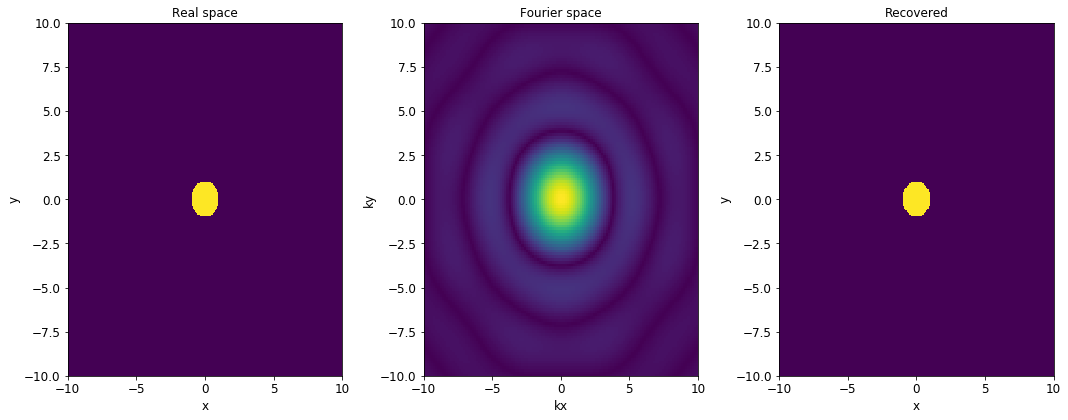

In [17]:
fig, axs = plt.subplots(1,3,figsize=(15,6))
# define 2D function is space
nx, ny     = 500, 500
xmax, ymax = 20, 20
x          = np.linspace(-xmax, xmax, nx)
y          = np.linspace(-ymax, ymax, ny)
dx         = x[1] - x[0]
dy         = y[1] - y[0]
X, Y       = np.meshgrid(x, y)
#f          = (X*X+Y*Y)<1          # circular hole, but with boolean values ...
f          = np.where((X*X+Y*Y)<1,1,0)

print(X.shape,Y.shape,f.shape,f.ndim)
print(X.min(),X.max())
print(Y.min(),Y.max())
print(f.min(),f.max())
axs[0].set_title('Real space')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_xlim([-10,10])
axs[0].set_ylim([-10,10])
axs[0].pcolormesh(X,Y,f)

# FFT
F    = np.fft.fft2(f)
F    = np.fft.fftshift(F) 
kx     = (-nx/2 + np.arange(0,nx))*2*np.pi/(2*xmax)
ky     = (-ny/2 + np.arange(0,ny))*2*np.pi/(2*ymax)
KX, KY = np.meshgrid(kx, ky)
axs[1].set_title('Fourier space')
axs[1].set_xlabel('kx')
axs[1].set_ylabel('ky')
axs[1].set_xlim([-10,10])
axs[1].set_ylim([-10,10])
axs[1].pcolormesh(KX,KY,np.abs(F))

# inverse FFT
F    = np.fft.ifftshift(F)
frecover    = np.fft.ifft2(F).real
axs[2].set_title('Recovered')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_xlim([-10,10])
axs[2].set_ylim([-10,10])
axs[2].pcolormesh(X,Y,frecover)
plt.tight_layout()

... done